In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv("../data/customer_segmentation.csv")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df["Response"].head()

0    1
1    0
2    0
3    0
4    0
Name: Response, dtype: int64

In [4]:
df.shape

(2240, 29)

In [5]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


## Preprocessing Data (EDA)

### Hapus kolom yang tidak perlu

- Kolom ID tidak perlu karena tidak ada pengaruh ke model
- Kolom Z_CostContact dan Z_Revenue karena nilai pada setiap baris sama

In [8]:
df = df.drop(columns=["ID", "Z_CostContact", "Z_Revenue"], axis=1)

### Duplicated Data

In [9]:
df.duplicated().sum()

np.int64(182)

In [10]:
df = df.drop_duplicates()

### Data Type Change

In [11]:
# Ubah tipe kolom "Dt_Customer" dari object ke datetime
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], errors="coerce", dayfirst=True)

- dayfirst=True untuk memulai dari hari
- errors="coerce" agar bila ada yang tidak sesuai menjadi NaT

In [12]:
# Ubah ke numerik dan buat fitur baru
df["DAYS_Dt_Customer"] = (datetime.today() - df["Dt_Customer"]).dt.days

In [13]:
# Hapus kolom datetime
df = df.drop(columns=["Dt_Customer"])

### Missing values

In [14]:
df.isna().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
DAYS_Dt_Customer        0
dtype: int64

Ganti nilai yang hilang dengan mean

In [15]:
mean_income = df["Income"].mean()
df["Income"] = df["Income"].fillna(mean_income)

In [16]:
df.isna().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
DAYS_Dt_Customer       0
dtype: int64

### Pisahkan data

In [17]:
# numeric data
df_num = ["Year_Birth", "Income", "Recency", "MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds", "NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth", "DAYS_Dt_Customer"]

# categorical data
df_cat = ["Education", "Marital_Status", "Kidhome", "Teenhome", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "AcceptedCmp1", "AcceptedCmp2", "Complain", "Response"]

### Outlier

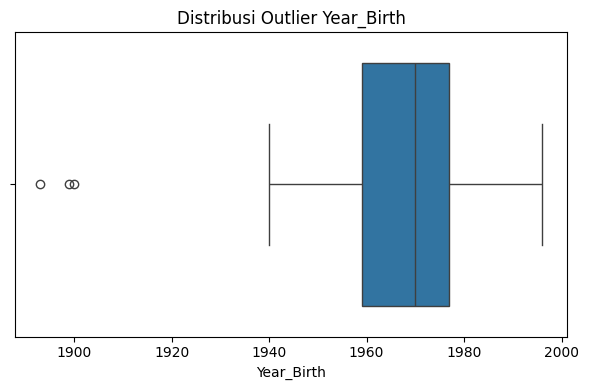

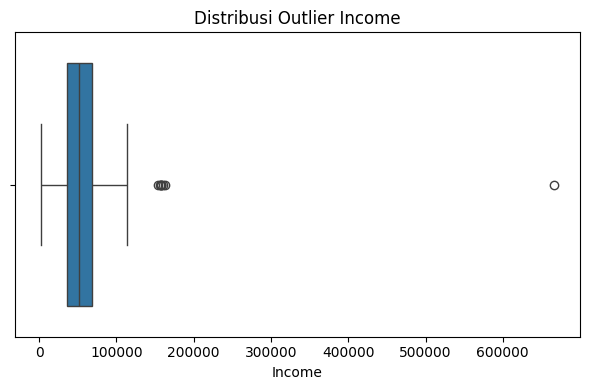

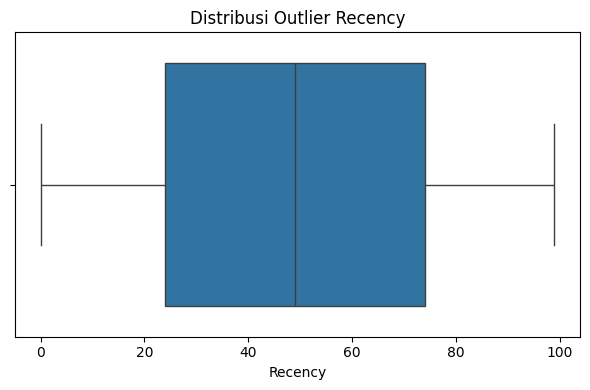

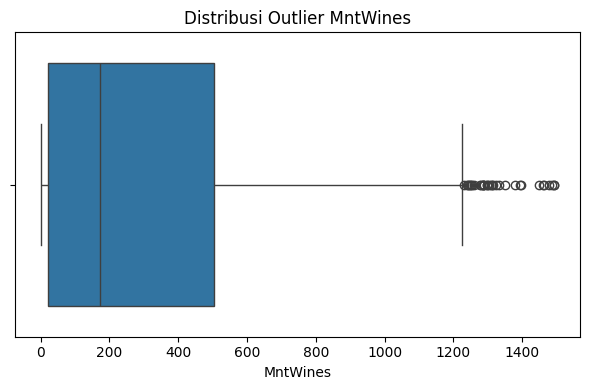

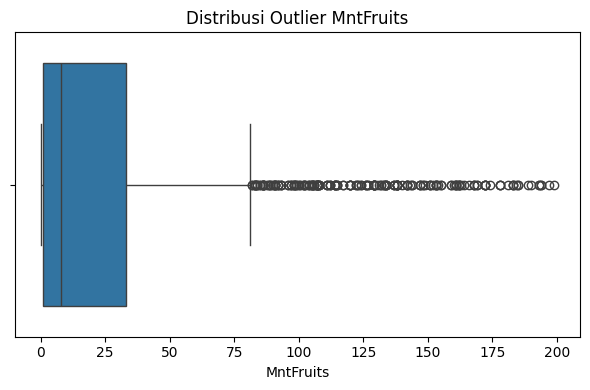

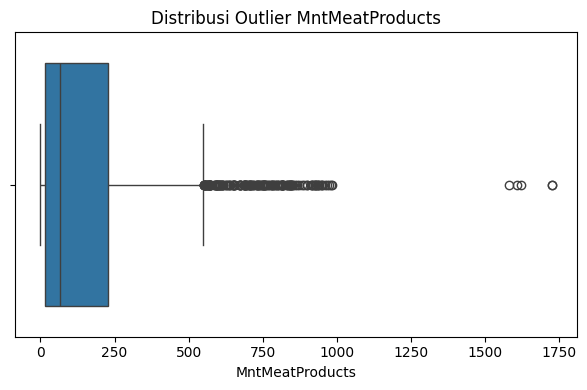

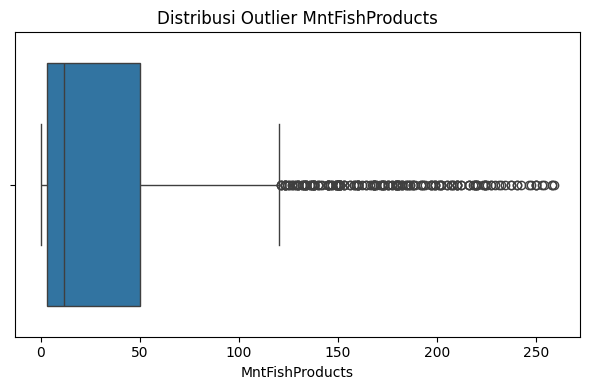

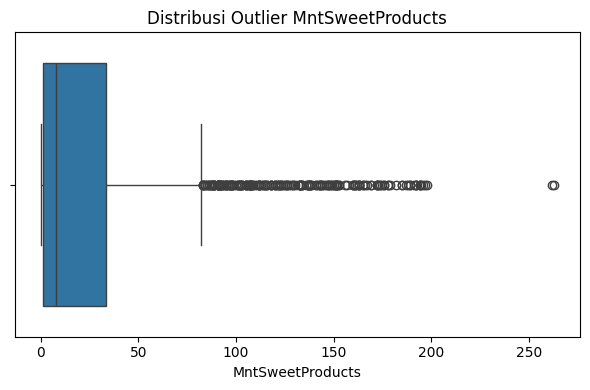

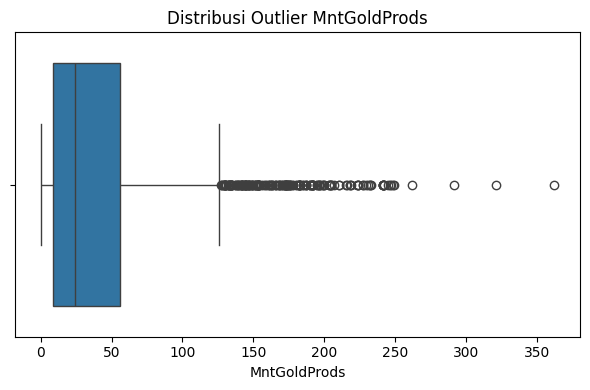

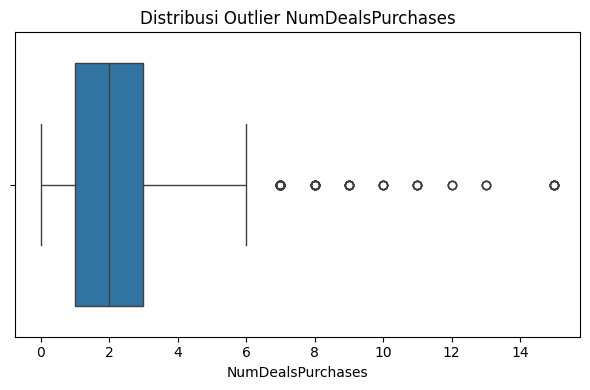

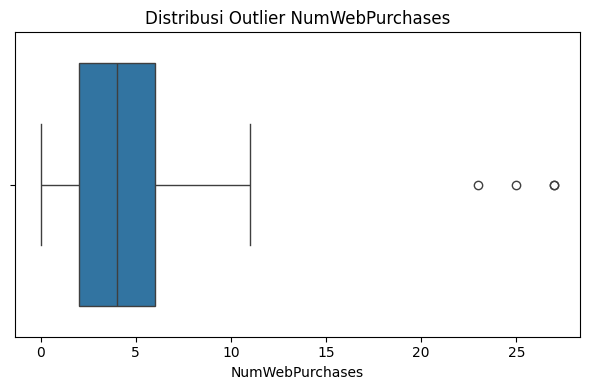

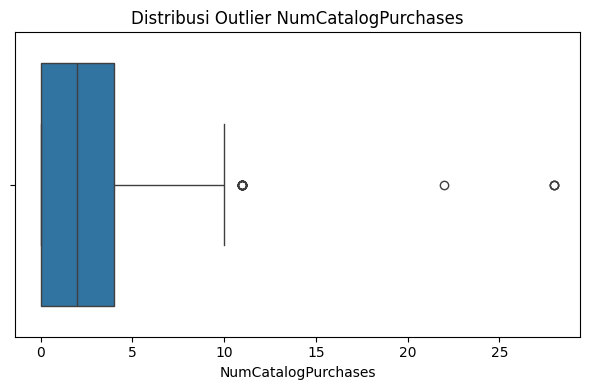

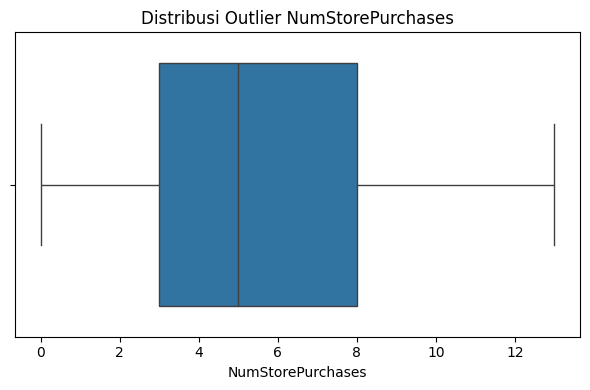

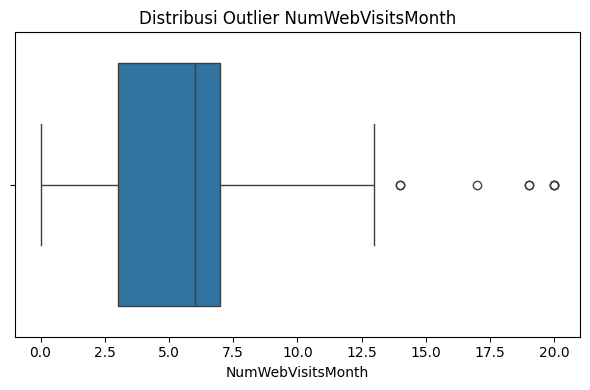

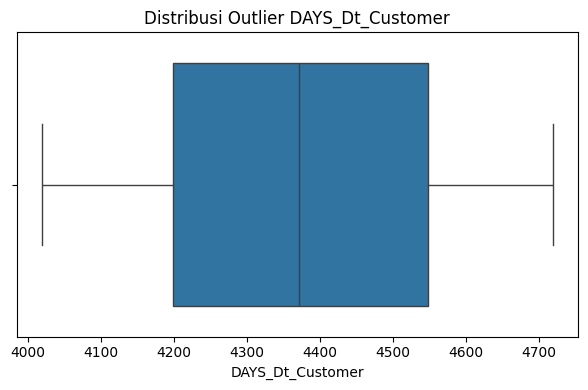

In [18]:
for col in df_num:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x=col).set_title(f"Distribusi Outlier {col}")
    plt.tight_layout()
plt.show()

In [19]:
for col in df_num:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    df[col] = df[col].clip(lower=lower, upper=upper)

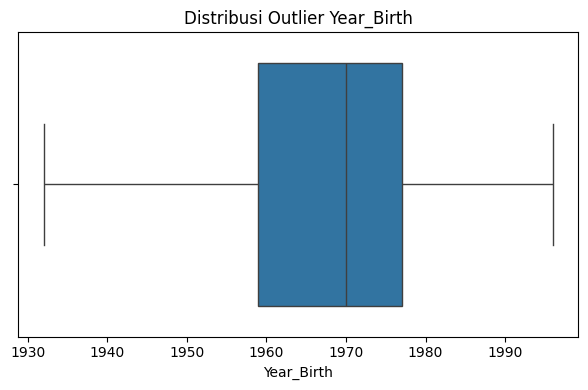

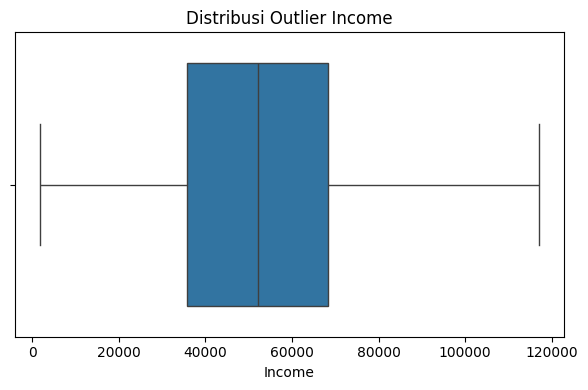

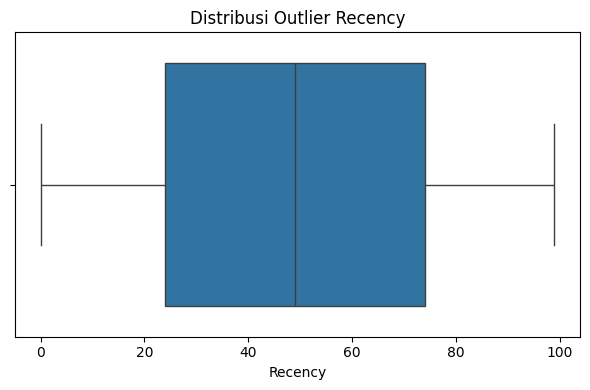

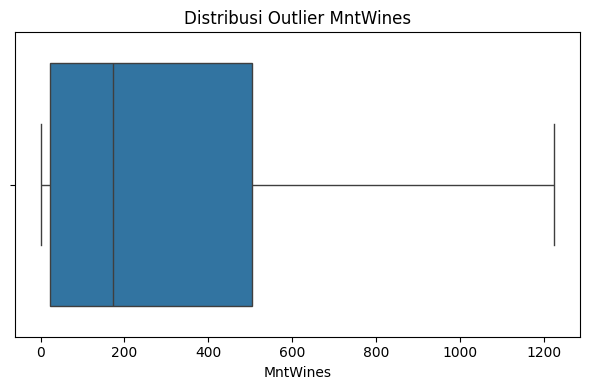

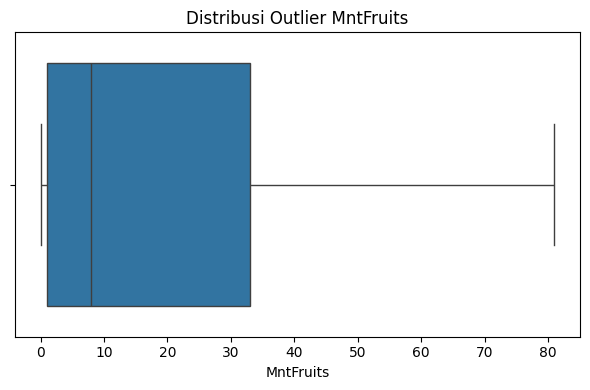

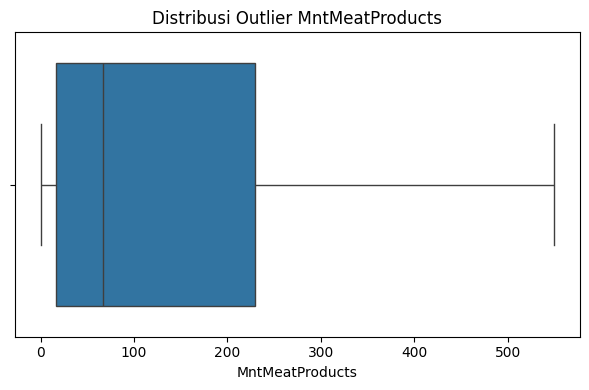

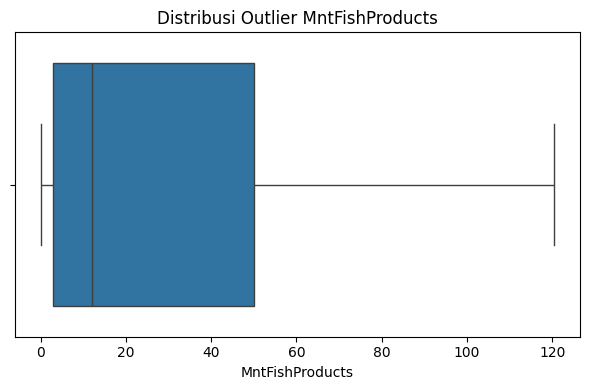

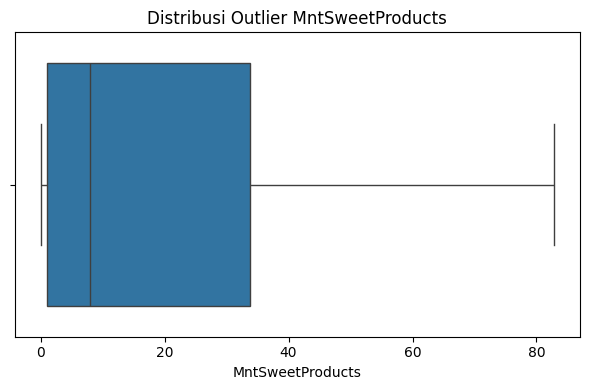

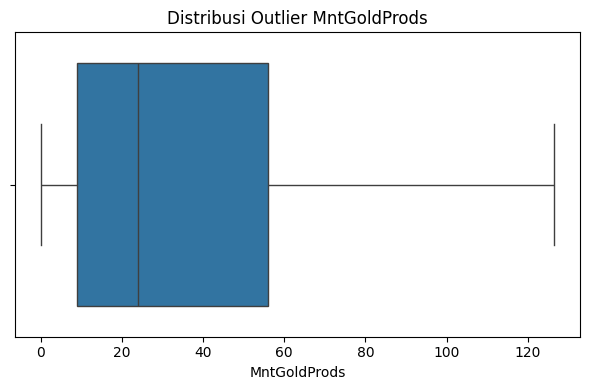

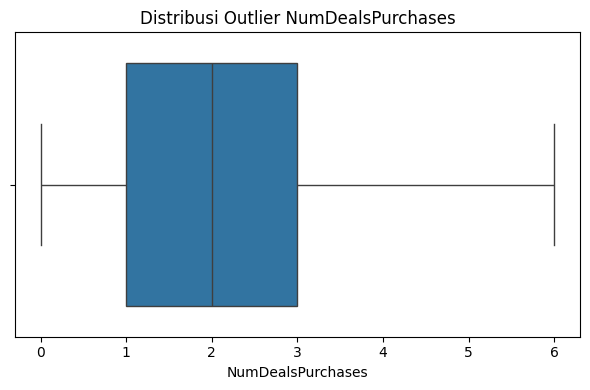

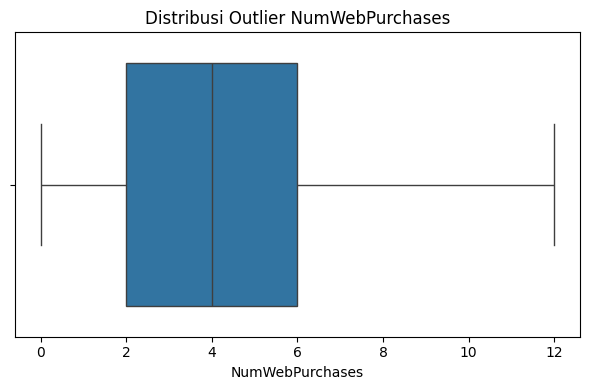

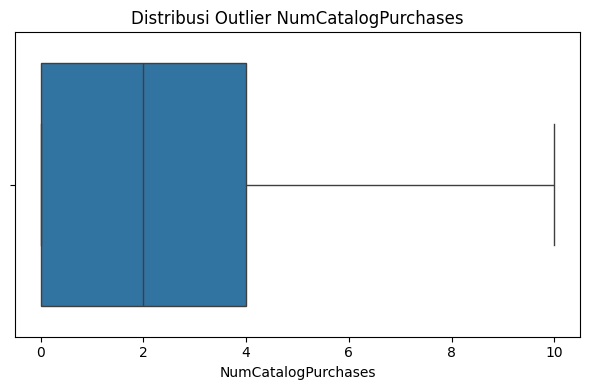

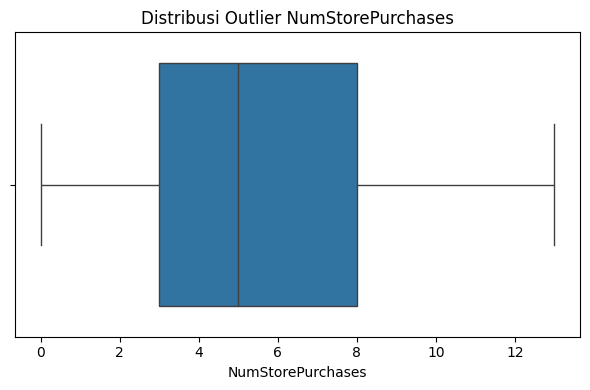

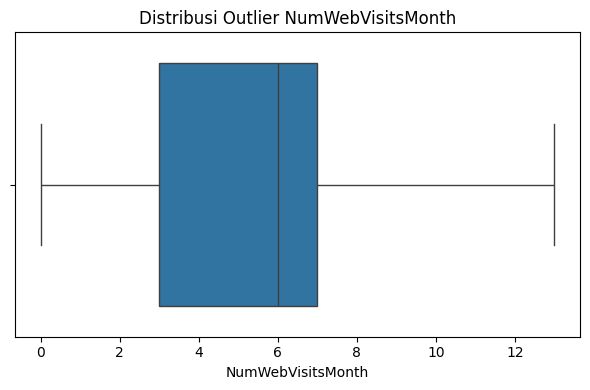

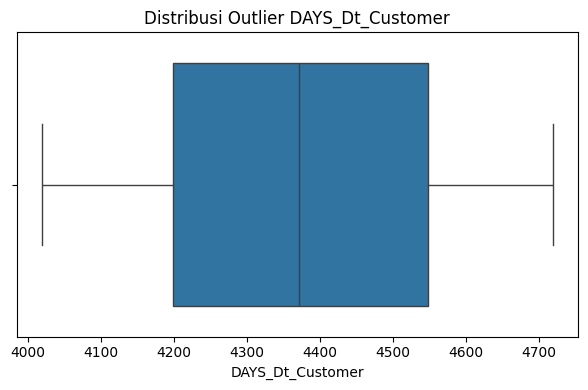

In [20]:
for col in df_num:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x=col).set_title(f"Distribusi Outlier {col}")
    plt.tight_layout()
plt.show()

### Analisis Data

#### 1. Berapa Distribusi Umur Pelanggan ?

In [21]:
# tahun sekarang
year_now = datetime.today().year
year_now

2025

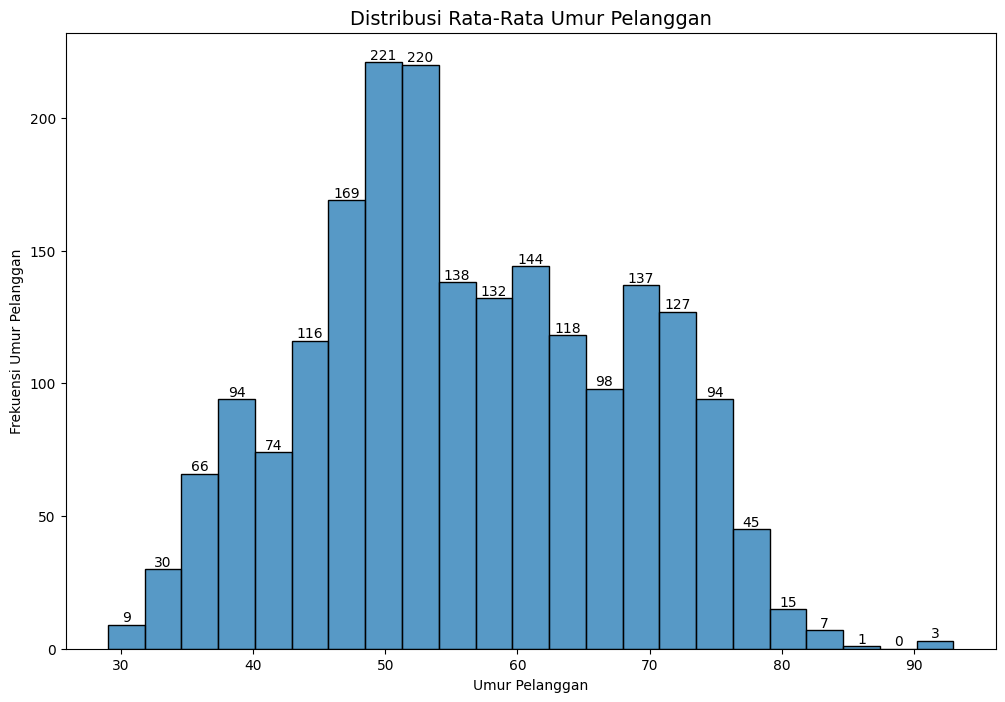

In [22]:
plt.figure(figsize=(12,8))
ax = sns.histplot(year_now - df["Year_Birth"])

for container in ax.containers:
    ax.bar_label(container)

plt.xlabel("Umur Pelanggan")
plt.ylabel("Frekuensi Umur Pelanggan")
plt.title("Distribusi Rata-Rata Umur Pelanggan", fontsize="14")
plt.show()

Pada umur 40 - 50 tahun adalah umur yang paling sering melakukan transaksi karena pada tahun itu sedang dalam masa produktif dan pekerjaan sudah matang sehingga sudah ada pendapatan yang layak sehingga juga semakin banyak pengeluaran juga. Pada umur lansia seperti 70 - 90 tahun sudah semakin berkurang untuk transaksi karena biasanya sudah pensiun dari pekerjaan sehingga harus semakin menghemat pengeluaran.

#### 2. Pendidikan apa yang paling banyak dimiliki pelanggan ?

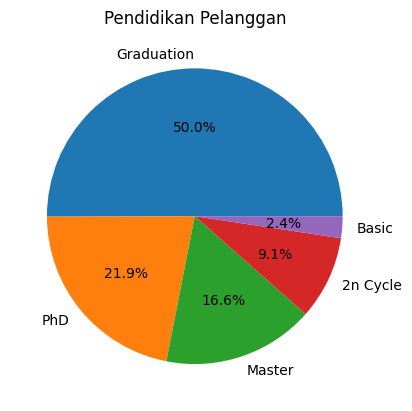

In [23]:
education_count = df["Education"].value_counts()

plt.pie(education_count, autopct="%1.1f%%", labels=education_count.index)
plt.title("Pendidikan Pelanggan")
plt.show()

Kebanyakan pelanggan yang melakukan transaksi adalah pelanggan yang baru lulus dengan nilai 50% atau setengah dari data dan biasanya sudah punya pengeluaran yang cukup. Untuk yang paling sedikit adalah yang basic karena biasanya pada saat itu masih belum punya pendapatan dan untuk melakukan transaksi pembelian kebanyakan harus minta uang ke orang tua sehingga pengeluaran lebih sedikit.

#### 3. Produk apa yang paling banyak dibeli pelanggan ?

In [24]:
produk = df[["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]].sum()

C:\Users\Arvio\AppData\Local\Temp\ipykernel_3040\3180522839.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Wine", "Fruits", "Meat", "Fish", "Sweet", "Gold"])


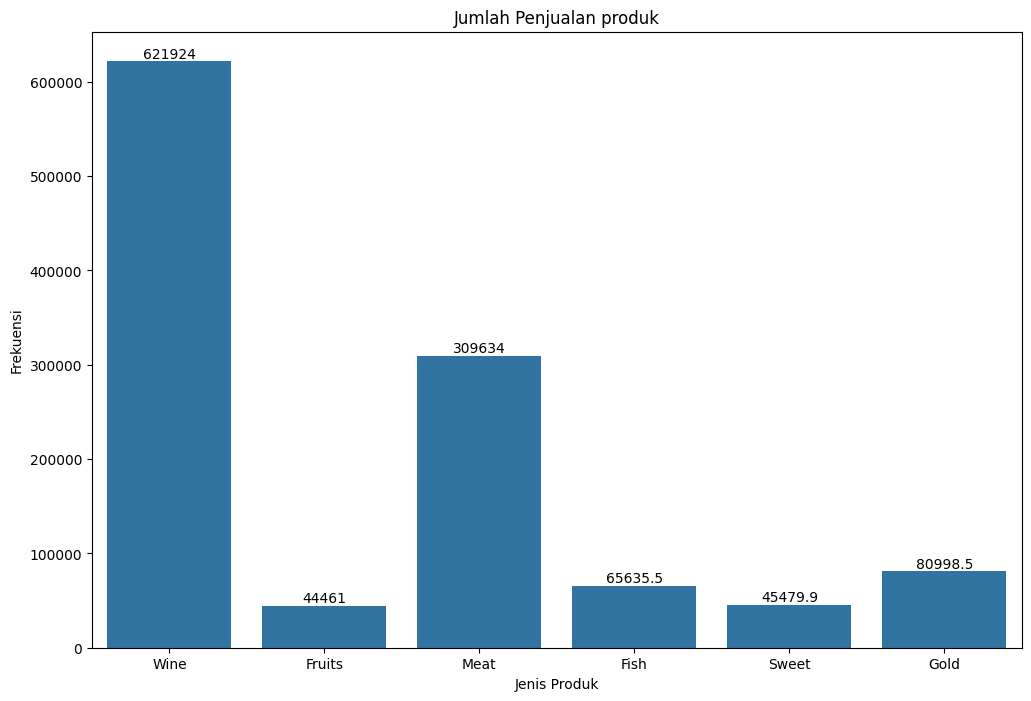

In [25]:
plt.figure(figsize=(12,8))
ax = sns.barplot(produk)

for container in ax.containers:
    ax.bar_label(container)

ax.set_xticklabels(["Wine", "Fruits", "Meat", "Fish", "Sweet", "Gold"])

plt.title("Jumlah Penjualan produk")
plt.xlabel("Jenis Produk")
plt.ylabel("Frekuensi")
plt.show()

Penjualan terbanyak adalah produk dengan jenis wine karena kebanyakan orang menyukai wine. Untuk yang kedua adalah daging karena daging adalah salah satu sumber makanan yang biasa banyak dimakan oleh banyak orang. Untuk yang paling sedikit adalah jenis buah karena orang-orang kurang menyukai buah yang dimana rasanya bisa manis, asam, dan pahit walaupun nutrisinya bagus dan menyehatkan.

#### 4. Apakah ada hubungan antara pendapatan pelanggan dan pengeluaran total?

In [26]:
total_pembelian = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]

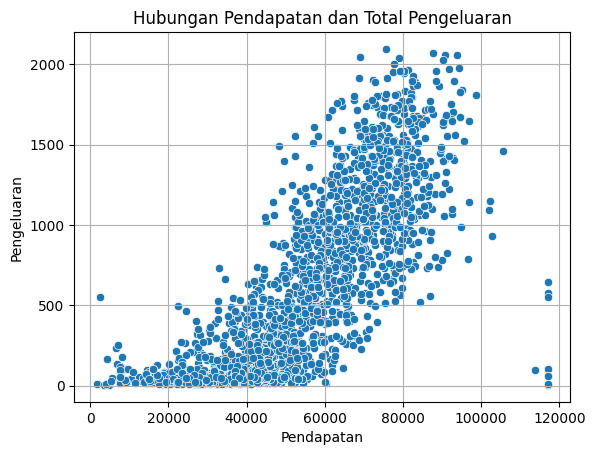

In [27]:
sns.scatterplot(data=df, x="Income", y=total_pembelian)
plt.title("Hubungan Pendapatan dan Total Pengeluaran")
plt.xlabel("Pendapatan")
plt.ylabel("Pengeluaran")
plt.grid(True)
plt.show()

Pada grafik berbanding lurus, yaitu semakin tinggi pendapatan maka semakin tinggi juga pengeluaran dan bila pendapatan rendah maka pengeluaran juga akan rendah karena perlu menghemat uang.

### Encoding

In [28]:
df_encoded = pd.get_dummies(df, columns=["Education", "Marital_Status"])
df_encoded.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,1957,58138.0,0,0,58,635.0,81,546.0,120.5,82.875,...,False,False,False,False,False,False,True,False,False,False
1,1954,46344.0,1,1,38,11.0,1,6.0,2.0,1.000,...,False,False,False,False,False,False,True,False,False,False
2,1965,71613.0,0,0,26,426.0,49,127.0,111.0,21.000,...,False,False,False,False,False,False,False,True,False,False
3,1984,26646.0,1,0,26,11.0,4,20.0,10.0,3.000,...,False,False,False,False,False,False,False,True,False,False
4,1981,58293.0,1,0,94,173.0,43,118.0,46.0,27.000,...,False,True,False,False,False,True,False,False,False,False


#### 5. Berdasarkan hasil korelasi, fitur apa yang paling berkorelasi ?

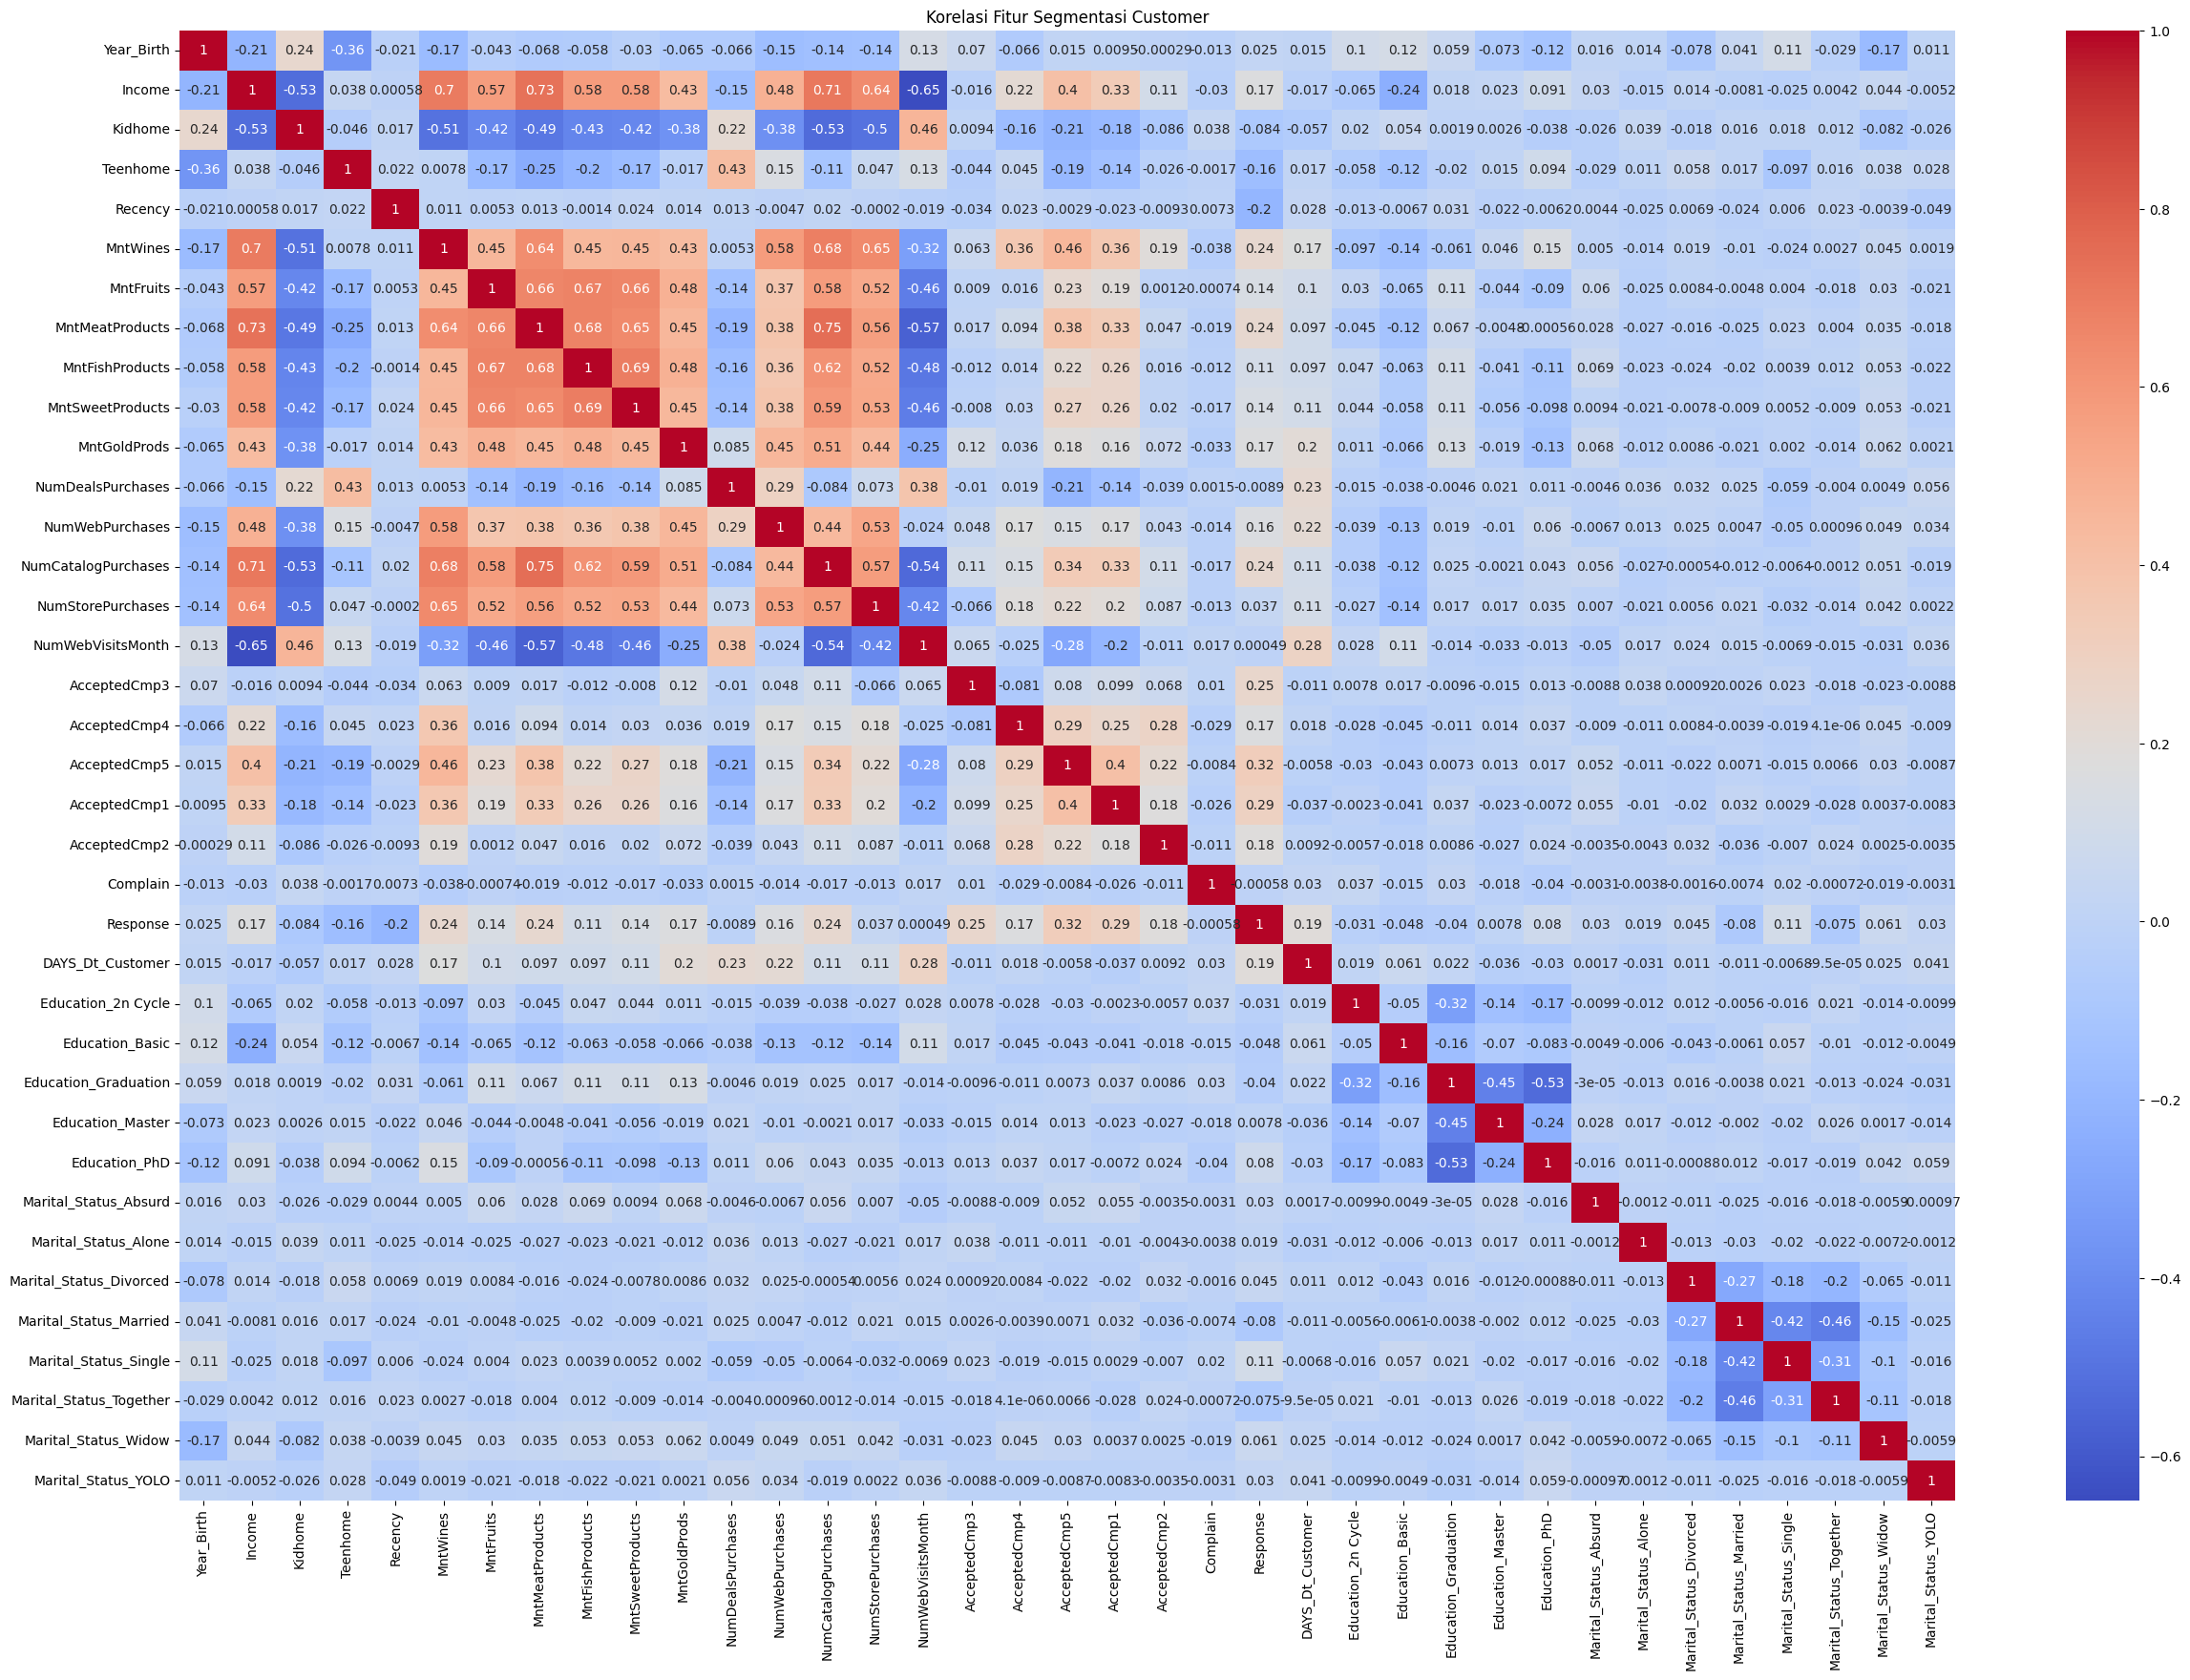

In [80]:
plt.figure(figsize=(30,20))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm")
plt.title("Korelasi Fitur Segmentasi Customer")
plt.show()

Terdapat fitur yang berkorelasi adalah beberapa produk yang dijual seperti ikan, emas, buah, dan lainnya karena produk tersebut bisa dilakukan penjumlahan secara total untuk menentukan harga total dari semua produk yang dibeli. Fitur income juga menunjukkan beberapa korelasi seperti income yang naik juga akan lebih sering membeli dari katalog, tetapi lebih jarang untuk melihat web perusahaan.

### Scaler

In [30]:
scaler = StandardScaler()

In [31]:
array_scaled = scaler.fit_transform(df_encoded)
array_scaled

array([[-1.00835703,  0.29545827, -0.82909732, ..., -0.58221304,
        -0.18902979, -0.03118914],
       [-1.2639024 , -0.26779461,  1.03162491, ..., -0.58221304,
        -0.18902979, -0.03118914],
       [-0.32690271,  0.93899163, -0.82909732, ...,  1.71758434,
        -0.18902979, -0.03118914],
       ...,
       [ 1.03600593,  0.24020275, -0.82909732, ..., -0.58221304,
        -0.18902979, -0.03118914],
       [-1.09353882,  0.82590168, -0.82909732, ...,  1.71758434,
        -0.18902979, -0.03118914],
       [-1.2639024 ,  0.04382359,  1.03162491, ..., -0.58221304,
        -0.18902979, -0.03118914]], shape=(2058, 37))

In [32]:
df_scaled = pd.DataFrame(data=array_scaled, columns=df_encoded.columns)
df_scaled

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,-1.008357,0.295458,-0.829097,-0.932051,0.312088,1.004720,2.185418,2.216715,2.200534,2.172280,...,-0.445648,-0.529009,-0.031189,-0.038208,-0.342438,-0.793381,1.895719,-0.582213,-0.18903,-0.031189
1,-1.263902,-0.267795,1.031625,0.898255,-0.377754,-0.879122,-0.758103,-0.809548,-0.742381,-0.754132,...,-0.445648,-0.529009,-0.031189,-0.038208,-0.342438,-0.793381,1.895719,-0.582213,-0.18903,-0.031189
2,-0.326903,0.938992,-0.829097,-0.932051,-0.791659,0.373754,1.008009,-0.131441,1.964604,-0.039283,...,-0.445648,-0.529009,-0.031189,-0.038208,-0.342438,-0.793381,-0.527504,1.717584,-0.18903,-0.031189
3,1.291551,-1.208523,1.031625,-0.932051,-0.791659,-0.879122,-0.647721,-0.731089,-0.543703,-0.682647,...,-0.445648,-0.529009,-0.031189,-0.038208,-0.342438,-0.793381,-0.527504,1.717584,-0.18903,-0.031189
4,1.036006,0.302861,1.031625,-0.932051,1.553804,-0.390047,0.787245,-0.181879,0.350347,0.175171,...,-0.445648,1.890326,-0.031189,-0.038208,-0.342438,1.260428,-0.527504,-0.582213,-0.18903,-0.031189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,0.695279,3.109126,1.031625,-0.932051,-0.895135,-0.885159,-0.279781,-0.742298,-0.593373,-0.754132,...,-0.445648,-0.529009,-0.031189,-0.038208,-0.342438,-0.793381,-0.527504,1.717584,-0.18903,-0.031189
2054,-0.156539,0.442790,-0.829097,0.898255,-0.101817,1.228124,0.787245,0.176789,0.251008,2.172280,...,-0.445648,-0.529009,-0.031189,-0.038208,-0.342438,1.260428,-0.527504,-0.582213,-0.18903,-0.031189
2055,1.036006,0.240203,-0.829097,-0.932051,1.450328,1.828901,0.971215,0.372936,0.002661,-0.360965,...,-0.445648,-0.529009,-0.031189,-0.038208,2.920236,-0.793381,-0.527504,-0.582213,-0.18903,-0.031189
2056,-1.093539,0.825902,-0.829097,0.898255,-1.412517,0.379792,0.308923,0.356123,1.194728,0.282399,...,2.243923,-0.529009,-0.031189,-0.038208,-0.342438,-0.793381,-0.527504,1.717584,-0.18903,-0.031189


### PCA

In [33]:
pca = PCA()

In [34]:
array_pca = pca.fit_transform(df_scaled)
array_pca

array([[ 4.54090610e+00, -2.31304326e-01, -9.49209561e-01, ...,
        -8.76932587e-02,  1.33639458e-16, -1.07073316e-15],
       [-2.53518800e+00, -6.24646018e-01, -2.95907880e-01, ...,
         7.42577764e-02,  7.99773273e-16, -9.04199702e-16],
       [ 2.10854141e+00, -4.87873358e-01, -1.54055354e+00, ...,
         3.01762298e-01, -1.86476199e-15, -2.55955958e-15],
       ...,
       [ 1.62741067e+00, -2.23565691e-01,  4.54258534e-01, ...,
         2.11796926e-01,  1.57692939e-15, -3.54097939e-15],
       [ 2.12875097e+00,  9.23523458e-01, -8.63295610e-01, ...,
        -2.31054294e-02, -6.43516659e-16,  3.27020285e-16],
       [-1.73584761e+00,  1.87400697e+00,  1.51665966e+00, ...,
         3.15895772e-01, -1.53169508e-15,  2.30309451e-16]],
      shape=(2058, 37))

In [35]:
pca.explained_variance_ratio_

array([1.96968479e-01, 6.18218260e-02, 5.35041834e-02, 4.94782397e-02,
       4.09825361e-02, 4.07544798e-02, 3.60540635e-02, 3.32205806e-02,
       3.23316350e-02, 3.14310878e-02, 2.99752183e-02, 2.86863122e-02,
       2.81353410e-02, 2.73553026e-02, 2.71838915e-02, 2.63543050e-02,
       2.54359168e-02, 2.52324107e-02, 2.17653784e-02, 2.07830873e-02,
       1.87797050e-02, 1.64416734e-02, 1.54915438e-02, 1.44351619e-02,
       1.39091552e-02, 1.29667846e-02, 1.24531458e-02, 9.91387289e-03,
       9.41435633e-03, 8.96061240e-03, 7.75778330e-03, 7.38531322e-03,
       5.85970474e-03, 4.94816510e-03, 3.82874814e-03, 1.73502155e-17,
       0.00000000e+00])

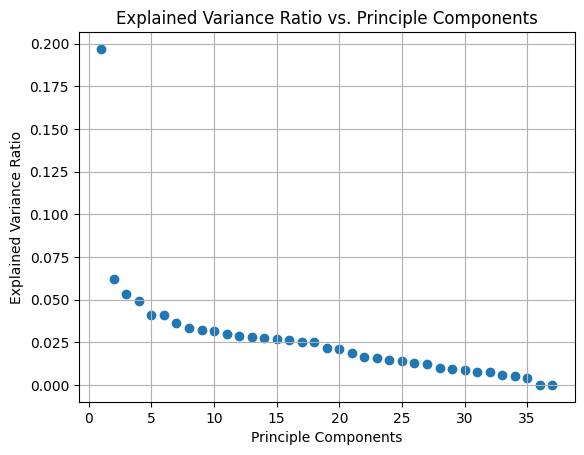

In [36]:
# plot the explained variance ratio
plt.figure()
plt.scatter(x=[i+1 for i in range(len(pca.explained_variance_ratio_))],
            y=pca.explained_variance_ratio_,)
plt.grid(True)
plt.title("Explained Variance Ratio vs. Principle Components")
plt.xlabel("Principle Components")
plt.ylabel("Explained Variance Ratio")
plt.show()

In [37]:
# create scree plot of PCA
cumulative_explained_variance = np.cumsum(np.round(pca.explained_variance_ratio_,3)*100)

cumulative_explained_variance

array([19.7, 25.9, 31.3, 36.2, 40.3, 44.4, 48. , 51.3, 54.5, 57.6, 60.6,
       63.5, 66.3, 69. , 71.7, 74.3, 76.8, 79.3, 81.5, 83.6, 85.5, 87.1,
       88.6, 90. , 91.4, 92.7, 93.9, 94.9, 95.8, 96.7, 97.5, 98.2, 98.8,
       99.3, 99.7, 99.7, 99.7])

Ambil berapa nilai sampai melewati 95 dan akan dijadikan fitur baru yang lebih ringkas

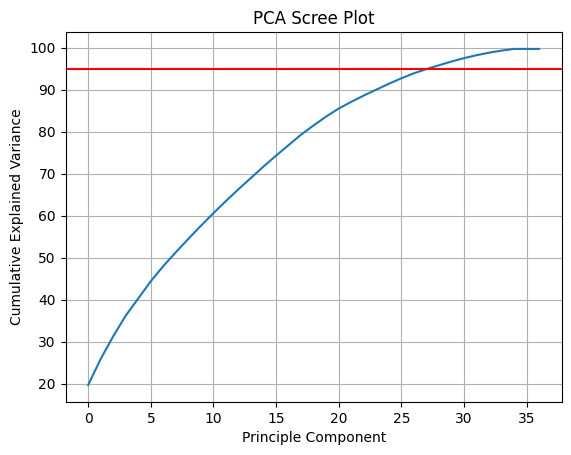

In [38]:
plt.figure()
plt.plot(cumulative_explained_variance)
plt.title("PCA Scree Plot")
plt.xlabel("Principle Component")
plt.ylabel("Cumulative Explained Variance")
plt.axhline(y=95, color='r') # minimal 95
plt.grid(True)
plt.show()

In [39]:
# berdasarkan garis temu ada di 9 atau lebih
pca = PCA(n_components=29)
array_pca = pca.fit_transform(df_scaled)

Fitur yang lebih dari 95 dari nilai sebelumnya ada 29 nilai sehingga menjadi 29 fitur baru

In [40]:
# Hitung PC dari cumulative_explained_variance sampai lebih dari 95
df_after_pca = pd.DataFrame(data=array_pca, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29']) # sesuaikan dengan komponen

In [41]:
df_after_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29
0,4.540906,-0.231304,-0.949210,3.037473,-1.399146,-0.774070,-1.601624,0.248476,0.465378,-0.378449,...,1.594095,1.043909,0.206817,1.702454,0.887123,-0.160877,0.478503,-0.566647,-1.388831,-1.062807
1,-2.535188,-0.624646,-0.295908,-0.566283,-0.462395,1.648677,-1.922817,0.732451,0.431469,-0.244946,...,0.573026,0.845864,-0.422971,0.154277,0.211020,-0.507246,-0.462197,-0.012107,-0.393280,0.138626
2,2.108541,-0.487873,-1.540554,-0.160148,-0.973262,0.915573,0.925469,-0.621817,-0.397131,-0.891723,...,-0.271843,-0.754457,0.938008,0.159907,0.700245,-0.802570,0.485897,-0.110816,0.478834,0.614613
3,-2.733051,-1.602494,-0.281688,0.222933,-0.668720,1.324659,1.183754,-0.550886,-0.475607,-0.978772,...,-1.062734,-0.315727,0.153082,-0.023759,0.097665,-0.049507,0.043681,-0.266997,0.283191,-0.115241
4,-0.278590,0.302118,-0.238204,-0.630996,1.337070,-1.455569,-0.116801,-1.470017,0.630151,-0.241647,...,-1.811827,1.050633,-0.213880,0.946960,0.302941,0.032893,0.320443,-0.328075,0.248883,-0.492083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,-1.132391,-0.311999,-0.487096,0.346867,-0.740213,1.283208,1.099316,-0.467158,-0.449362,-1.128047,...,-0.680156,0.202222,-0.612503,-0.172510,-0.505696,-0.227039,-0.474445,-0.675519,-0.743882,0.760803
2054,2.313848,0.891792,-1.824186,0.973021,1.499338,0.036425,-0.052099,-0.008965,-0.067657,-0.290539,...,0.172547,-0.244631,0.190840,-0.323721,1.269532,0.599501,0.582495,1.195436,-1.086108,-0.132528
2055,1.627411,-0.223566,0.454259,-0.179269,0.190952,2.303434,-0.090669,-0.126091,0.759299,2.755306,...,-1.227752,-2.652989,0.160175,1.768586,-0.819693,-0.061523,-0.395434,-0.134279,1.143365,0.715994
2056,2.128751,0.923523,-0.863296,-2.132312,-1.525429,-0.297391,1.443091,1.761892,-0.379992,-1.103536,...,-0.415082,0.150512,0.288579,-0.018272,0.157152,-0.028728,0.002257,0.074477,0.066833,-0.007090


Setelah dilakukan PCA untuk pengurangan kolom yang tadinya ada 37 kolom menjadi hanya 29 kolom

## K-means

### Inertia

<Axes: >

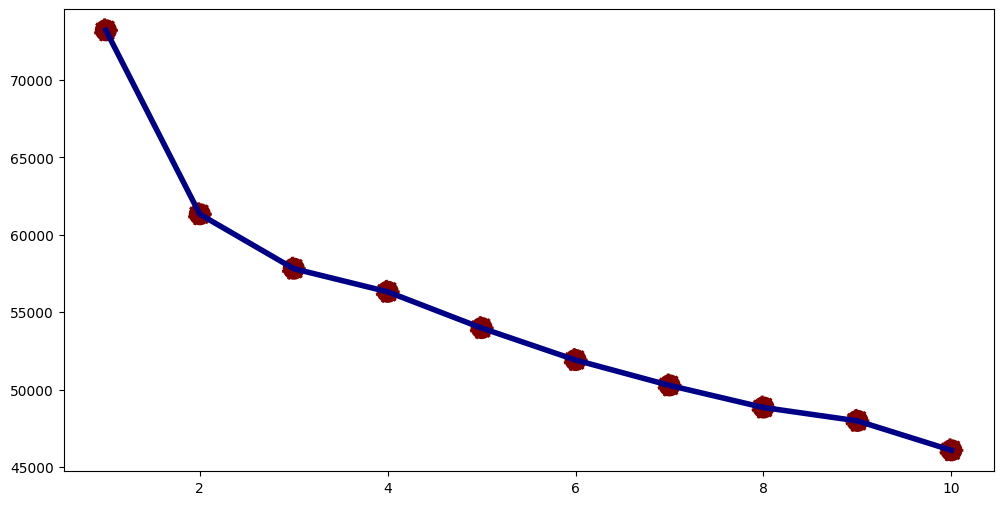

In [42]:
inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_after_pca.values)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))

sns.lineplot(x=range(1, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(1, 11), y=inertia, s=300, color='#800000',  linestyle='--')

Terdapat siku yang sedikit tajam pada nilai 2 atau 3 yang berguna sebagai acuan untuk menentukan jumlah cluster yang akan dilakukan

### Silhouette Score

In [43]:
range_n_clusters = list(range(2,11))
print(range_n_clusters)

[2, 3, 4, 5, 6, 7, 8, 9, 10]


In [44]:
arr_silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i, random_state=42).fit(df_after_pca)
    preds = kmeans.predict(df_after_pca)

    score_euclidean = silhouette_score(df_after_pca, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

<Axes: >

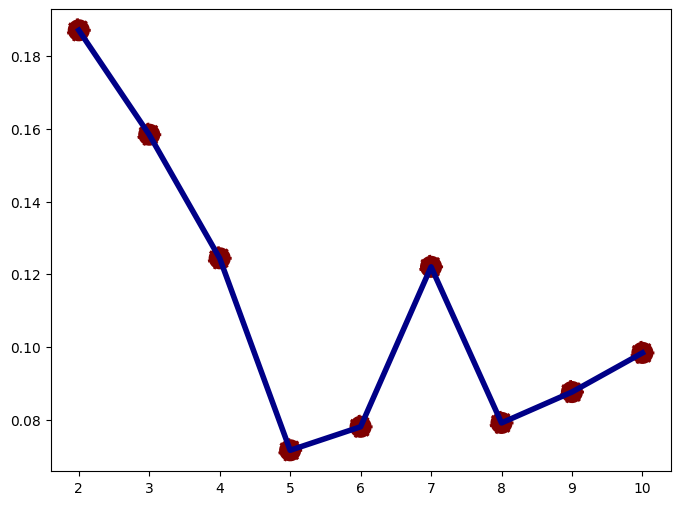

In [45]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=range(2,11), y=arr_silhouette_score_euclidean, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2,11), y=arr_silhouette_score_euclidean, s=300, color='#800000',  linestyle='--')

Dari hasil pada grafik silhouette score dapat ditentukan bahwa cluster bisa menjadi 2 atau 3 karena kedua nilai tersebut paling tinggi pada grafik. Tetapi dalam hal customer segmentation akan mengambil cluster sebanyak 3 karena kalau dengan 2 cluster terlalu simpel dan hanya seperti pelanggan tersebut aktif dan tidak aktif saja.

In [46]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df_after_pca.values)

KMeans(n_clusters=3, random_state=0)

In [47]:
df_after_pca['cluster'] = kmeans.labels_

<Axes: xlabel='PC1', ylabel='PC2'>

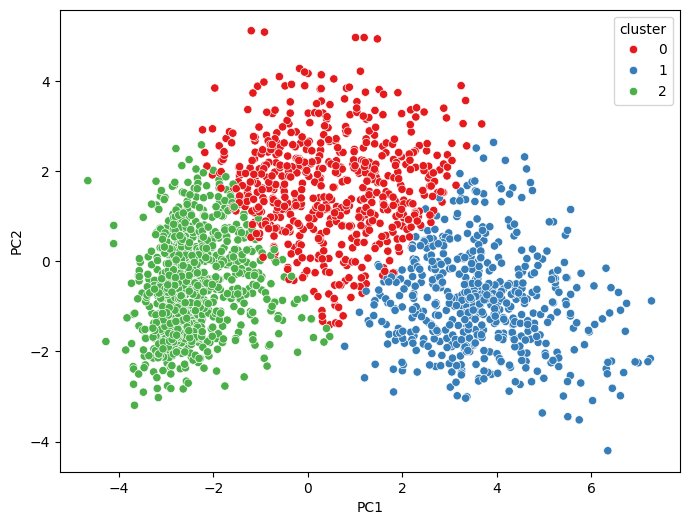

In [48]:
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(data=df_after_pca, x='PC1', y='PC2',
                hue='cluster', palette="Set1")

In [49]:
# rata-rata dari tiap PCA dari setiap cluster
df_after_pca.groupby('cluster').mean()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.485176,1.639596,-0.253610,0.114107,-0.004517,0.003544,0.019024,0.066223,0.140666,-0.038769,...,-0.148716,-0.168602,0.043613,-0.077478,0.009031,0.069208,0.061740,-0.088618,0.069795,-0.013872
1,3.667090,-0.862331,0.017278,-0.087335,-0.013349,-0.053623,-0.008202,-0.064255,-0.061285,-0.003751,...,0.060698,0.094094,-0.026704,0.084112,0.002462,-0.046926,-0.051585,0.003673,-0.064012,0.007450
2,-2.438345,-0.553443,0.152937,-0.022672,0.010643,0.028820,-0.007467,-0.005289,-0.054845,0.027086,...,0.060358,0.053769,-0.012538,0.001006,-0.007230,-0.017257,-0.009756,0.054811,-0.007725,0.004593


In [50]:
# Gabungkan cluster ke data sebelum PCA
df_scaled['cluster'] = df_after_pca['cluster']

# Lihat rata-rata fitur asli per klaster
df_scaled.groupby('cluster').mean()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
cluster,,,,,,,,,,,,,,,,,,,,,
0,-0.358685,0.248465,-0.366262,0.741372,-0.020717,0.425036,-0.054812,-0.117468,-0.091294,-0.068065,...,0.096786,0.141899,-0.031189,0.005844,0.074307,0.024691,-0.156894,0.032355,0.078024,0.076689
1,-0.052640,1.136456,-0.752867,-0.601437,0.001338,0.902066,1.135932,1.361533,1.186935,1.134834,...,-0.070010,-0.055955,0.088340,-0.038208,-0.044727,-0.032286,0.059123,-0.008334,0.045647,-0.031189
2,0.260999,-0.818697,0.671939,-0.127586,0.012536,-0.796227,-0.623523,-0.714092,-0.629659,-0.614371,...,-0.021590,-0.058728,-0.031189,0.018403,-0.021808,0.002858,0.066526,-0.015956,-0.076606,-0.031189


Menjadikan hasil dari PCA ke data sebelum PCA adalah untuk melihat persebaran nilai dengan ada kolom-kolom yang ada maknanya sehingga dapat diketahui hasil akhirnya

Berdasarkan pembagian cluster telah terbagi diantaranya :
- Cluster 0 : Pelanggan yang memiliki banyak anak, income sedang, dan pembelian produk sedang. Cluster 0 untuk pelanggan berkeluarga dan bisa diberikan untuk promo keluarga.
- Cluster 1 : Pelanggan dengan income yang besar dan pembelian produk yang tinggi. Cluster 1 untuk pelanggan yang premium dan bisa diberikan produk ekslusif.
- Cluster 2 : Pelanggan yang memiliki income rendah, dan pembelian produk sedikit. Cluster 2 untuk pelanggan yang hemat dan bisa diberikan diskon harga.